<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.151887,85.376427,25.400805,67.522442,0.004565,241.456126,241.456434,-0.000308
1,0.0,1.0,80.488636,29.934906,88.545113,70.073156,-0.003439,279.038373,279.032765,0.005608
2,0.0,2.0,50.992151,67.783843,66.332643,27.393780,-0.000694,222.501723,222.499622,0.002102
3,0.0,3.0,34.288503,34.310683,64.949152,58.599332,-0.006730,202.140941,202.142579,-0.001638
4,0.0,4.0,46.893820,83.902626,25.154571,25.271338,0.006265,191.228620,191.224936,0.003685
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,27.138888,84.300716,75.804071,54.287263,0.006949,251.537887,251.535209,0.002678
29996,999.0,26.0,32.554392,38.829179,42.276606,56.529807,-0.005879,180.184105,180.187912,-0.003807
29997,999.0,27.0,65.854629,48.837029,70.749469,38.200052,0.006128,233.647306,233.641849,0.005457
29998,999.0,28.0,22.981633,88.715988,53.158676,61.122146,-0.006574,235.971869,235.981966,-0.010097


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.151887  85.376427  25.400805  67.522442  0.004565  241.456126   
      1.0    80.488636  29.934906  88.545113  70.073156 -0.003439  279.038373   
      2.0    50.992151  67.783843  66.332643  27.393780 -0.000694  222.501723   
      3.0    34.288503  34.310683  64.949152  58.599332 -0.006730  202.140941   
      4.0    46.893820  83.902626  25.154571  25.271338  0.006265  191.228620   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   27.138888  84.300716  75.804071  54.287263  0.006949  251.537887   
      26.0   32.554392  38.829179  42.276606  56.529807 -0.005879  180.184105   
      27.0   65.854629  48.837029  70.749469  38.200052  0.006128  233.647306   
      28.0   22.981633  88.715988  53.158676  61.122146 -0.006574  235.971869   
      29.0   84.812650  59.637285  35.632565  38.314381 -0.002351  228.394530   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    241.456434 -0.000308  
      1.0    279.032765  0.005608  
      2.0    222.499622  0.002102  
      3.0    202.142579 -0.001638  
      4.0    191.224936  0.003685  
...                 ...       ...  
999.0 25.0   251.535209  0.002678  
      26.0   180.187912 -0.003807  
      27.0   233.641849  0.005457  
      28.0   235.981966 -0.010097  
      29.0   228.397130 -0.002600  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.151887  85.376427  25.400805  67.522442  0.004565  241.456126   
      1.0    80.488636  29.934906  88.545113  70.073156 -0.003439  279.038373   
      2.0    50.992151  67.783843  66.332643  27.393780 -0.000694  222.501723   
      3.0    34.288503  34.310683  64.949152  58.599332 -0.006730  202.140941   
      4.0    46.893820  83.902626  25.154571  25.271338  0.006265  191.228620   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   27.138888  84.300716  75.804071  54.287263  0.006949  251.537887   
      26.0   32.554392  38.829179  42.276606  56.529807 -0.005879  180.184105   
      27.0   65.854629  48.837029  70.749469  38.200052  0.006128  233.647306   
      28.0   22.981633  88.715988  53.158676  61.122146 -0.006574  235.971869   
      29.0   84.812650  59.637285  35.632565  38.314381 -0.002351  228.394530   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    241.456434 -0.000308  
      1.0    279.032765  0.005608  
      2.0    222.499622  0.002102  
      3.0    202.142579 -0.001638  
      4.0    191.224936  0.003685  
...                 ...       ...  
999.0 25.0   251.535209  0.002678  
      26.0   180.187912 -0.003807  
      27.0   233.641849  0.005457  
      28.0   235.981966 -0.010097  
      29.0   228.397130 -0.002600  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.151887,85.376427,25.400805,67.522442,0.004565,241.456126,241.456434,-0.000308
1,0.0,1.0,80.488636,29.934906,88.545113,70.073156,-0.003439,279.038373,279.032765,0.005608
2,0.0,2.0,50.992151,67.783843,66.332643,27.393780,-0.000694,222.501723,222.499622,0.002102
3,0.0,3.0,34.288503,34.310683,64.949152,58.599332,-0.006730,202.140941,202.142579,-0.001638
4,0.0,4.0,46.893820,83.902626,25.154571,25.271338,0.006265,191.228620,191.224936,0.003685
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,27.138888,84.300716,75.804071,54.287263,0.006949,251.537887,251.535209,0.002678
29996,999.0,26.0,32.554392,38.829179,42.276606,56.529807,-0.005879,180.184105,180.187912,-0.003807
29997,999.0,27.0,65.854629,48.837029,70.749469,38.200052,0.006128,233.647306,233.641849,0.005457
29998,999.0,28.0,22.981633,88.715988,53.158676,61.122146,-0.006574,235.971869,235.981966,-0.010097


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.151887  85.376427  25.400805  67.522442  0.004565  241.456126   
      1.0    80.488636  29.934906  88.545113  70.073156 -0.003439  279.038373   
      2.0    50.992151  67.783843  66.332643  27.393780 -0.000694  222.501723   
      3.0    34.288503  34.310683  64.949152  58.599332 -0.006730  202.140941   
      4.0    46.893820  83.902626  25.154571  25.271338  0.006265  191.228620   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   27.138888  84.300716  75.804071  54.287263  0.006949  251.537887   
      26.0   32.554392  38.829179  42.276606  56.529807 -0.005879  180.184105   
      27.0   65.854629  48.837029  70.749469  38.200052  0.006128  233.647306   
      28.0   22.981633  88.715988  53.158676  61.122146 -0.006574  235.971869   
      29.0   84.812650  59.637285  35.632565  38.314381 -0.002351  228.394530   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    241.456434 -0.000308  
      1.0    279.032765  0.005608  
      2.0    222.499622  0.002102  
      3.0    202.142579 -0.001638  
      4.0    191.224936  0.003685  
...                 ...       ...  
999.0 25.0   251.535209  0.002678  
      26.0   180.187912 -0.003807  
      27.0   233.641849  0.005457  
      28.0   235.981966 -0.010097  
      29.0   228.397130 -0.002600  

[30000 rows x 8 columns]

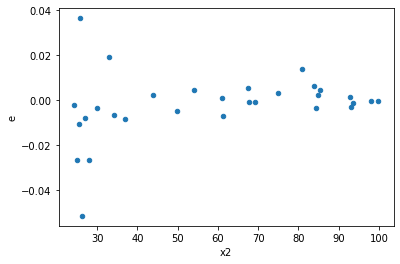

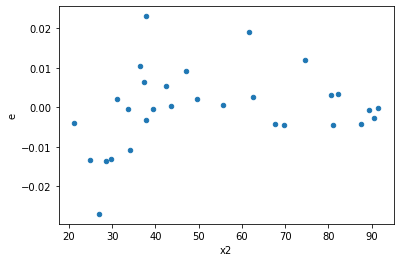

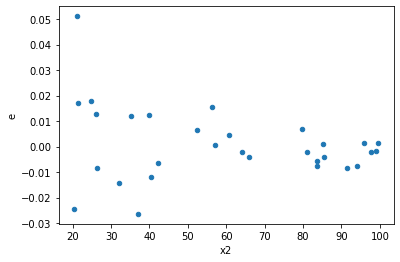

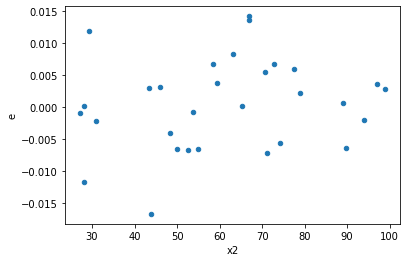

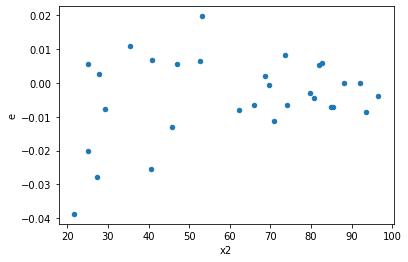

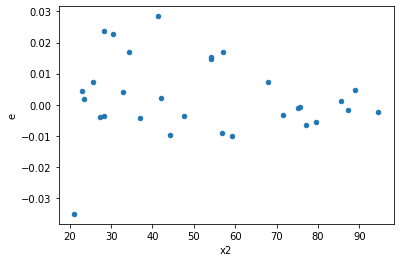

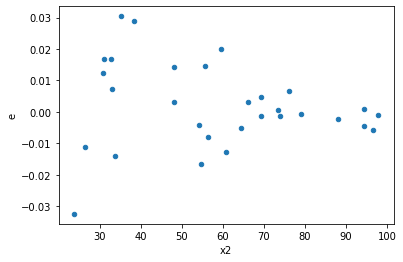

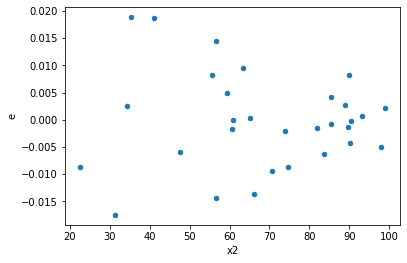

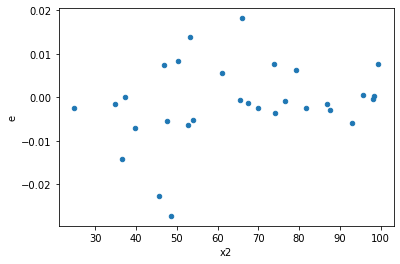

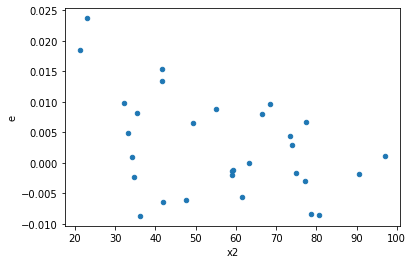

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,11.0,0.0002787661837414674,0.005118423258155696,2.53423803401334e-05,0.00046531120528688145,18.360990524240236,3.291963277884946e-05,0.9999835401836106,1.645981638942473e-05,Reject001=0 : Heteroscedasticity
1.0,7.0,15.0,0.0002902047905997757,0.0017097955727328593,4.1457827228539384e-05,0.00011398637151552395,2.7494535805546567,0.09490386478251644,0.9525480676087418,0.04745193239125822,Reject001=1 : Homoscedasticity
2.0,10.0,12.0,0.0002150299867751195,0.001779519594213152,2.150299867751195e-05,0.00014829329951776267,6.896400903974816,0.0025925680242766536,0.9987037159878617,0.0012962840121383268,Reject001=0 : Heteroscedasticity
4.0,13.0,9.0,0.0006369666950142744,0.0025211190370008608,4.899743807802111e-05,0.00028012433744454006,5.717122127864805,0.013005593651403302,0.9934972031742983,0.006502796825701651,Reject001=1 : Homoscedasticity
7.0,8.0,14.0,0.0003011049933859024,0.0010494463039815904,3.76381241732378e-05,7.496045028439931e-05,1.9916096227159792,0.24801555254263885,0.8759922237286806,0.12400777627131943,Reject001=1 : Homoscedasticity
10.0,8.0,14.0,0.0002049715450968686,0.0011761355989353456,2.5621443137108575e-05,8.400968563823898e-05,3.2788818798643056,0.05036508595799871,0.9748174570210006,0.025182542978999356,Reject001=1 : Homoscedasticity
11.0,11.0,11.0,0.00028028249765042214,0.002229672939165235,2.5480227059129287e-05,0.00020269753992411228,7.955091587438894,0.0017917259654158801,0.9991041370172921,0.0008958629827079401,Reject001=0 : Heteroscedasticity
12.0,12.0,10.0,0.0006653503864901061,0.0031593714304395458,5.544586554084217e-05,0.0003159371430439546,5.698119056527867,0.009753803527148275,0.9951230982364259,0.004876901763574137,Reject001=0 : Heteroscedasticity
13.0,10.0,12.0,0.0010544174747674697,0.0014171956848410211,0.00010544174747674697,0.00011809964040341843,1.1200463121067195,0.8400390753588922,0.5799804623205539,0.4200195376794461,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,0.0002787661837414674,0.005118423258155696,2.53423803401334e-05,0.00046531120528688145,18.360990524240236,3.291963277884946e-05,Reject001=0 : Heteroscedasticity
1.0,7.0,15.0,0.0002902047905997757,0.0017097955727328593,4.1457827228539384e-05,0.00011398637151552395,2.7494535805546567,0.09490386478251644,Reject001=1 : Homoscedasticity
2.0,10.0,12.0,0.0002150299867751195,0.001779519594213152,2.150299867751195e-05,0.00014829329951776267,6.896400903974816,0.0025925680242766536,Reject001=0 : Heteroscedasticity
3.0,6.0,16.0,0.00042215103980611365,0.0006761675559370703,7.035850663435228e-05,4.2260472246066896e-05,0.6006448156395829,0.5480079007389366,Reject001=1 : Homoscedasticity
4.0,13.0,9.0,0.0006369666950142744,0.0025211190370008608,4.899743807802111e-05,0.00028012433744454006,5.717122127864805,0.013005593651403302,Reject001=1 : Homoscedasticity
5.0,9.0,13.0,0.002300501481138948,0.0009563140248593969,0.00025561127568210533,7.356261729687669e-05,0.2877909712729727,0.06769459851221836,Reject001=1 : Homoscedasticity
6.0,13.0,9.0,0.003898138343925557,0.0005495080981476421,0.00029985679568658133,6.105645534973801e-05,0.203618714759948,0.010214896343699686,Reject001=1 : Homoscedasticity
7.0,8.0,14.0,0.0003011049933859024,0.0010494463039815904,3.76381241732378e-05,7.496045028439931e-05,1.9916096227159792,0.24801555254263885,Reject001=1 : Homoscedasticity
8.0,10.0,12.0,0.0010843000579821753,0.0008044652551155093,0.00010843000579821753,6.703877125962578e-05,0.6182677088884544,0.4541046702259035,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      757
Reject001=0 : Heteroscedasticity    243
Name: Result_test, dtype: int64